In [1]:
import shapefile
from pyproj import Proj, transform


shape = shapefile.Reader("GO_2semestre_2017_ETRS89.shp")
#first feature of the shapefile
feature = shape.shapeRecords()[105]
first = feature.shape.__geo_interface__  


In [2]:
print(first) # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

{'type': 'MultiPolygon', 'coordinates': [[((511284.80882902775, 4294783.493923283), (511284.78315999976, 4294783.043906391), (511284.9074721597, 4294782.5853371695), (511285.3720183138, 4294781.030323145), (511286.76421595644, 4294779.684146908), (511288.168552548, 4294778.108060026), (511288.6886349561, 4294775.973977145), (511288.79202532495, 4294773.505947291), (511289.06219201564, 4294771.369398924), (511290.1682139668, 4294769.630649102), (511291.622469851, 4294768.065065294), (511292.51097639697, 4294766.074326697), (511293.80669554806, 4294764.367363816), (511295.01113762445, 4294762.789438828), (511296.2759890147, 4294761.1720953565), (511296.6577260304, 4294758.866700676), (511296.22999769443, 4294756.533626886), (511295.61326686514, 4294754.1087332675), (511295.3341765044, 4294751.917024921), (511295.2464286289, 4294749.5772243105), (511295.9546941001, 4294747.624734767), (511297.7273459943, 4294746.2120790975), (511299.9177175787, 4294745.023402351), (511301.95555083855, 429

In [3]:
feature.shape.points[0]

(511284.80882902775, 4294783.493923283)

In [4]:

inProj = Proj(init='epsg:32629')
outProj = Proj(init='epsg:4326')
x1,y1 = feature.shape.points[1]
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

-8.870040253593748 38.8017327149977


In [5]:
test = file.shapeRecords()[54]
file.fields
test.record

NameError: name 'file' is not defined

In [13]:
inProj = Proj(init='epsg:32629')
outProj = Proj(init='epsg:4326')

filename = 'GO_1semestre_2015_ETRS89'
file = shapefile.Reader(filename+".shp")

for i in range(file.numRecords):
    shape = file.shapeRecords()[i].shape.__geo_interface__  
    coords = ''
    for j in range(len(shape['coordinates'][0][0])):
            n_tuples = len(shape['coordinates'][0][0])
            if n_tuples == 2:
                x1,y1 = shape['coordinates'][0][j]
                x2,y2 = transform(inProj,outProj,x1,y1)
            else:
                x1,y1 = shape['coordinates'][0][0][j]
                x2,y2 = transform(inProj,outProj,x1,y1)
            coords+=('{} {}, '.format(x2, y2))
    coords = coords[:-2]
    code = file.shapeRecords()[i].record
    with open("./output/output_{}_{}_{}_{}.txt".format(i, filename, code[0], code[1]), "w") as text_file:
        print("POLYGON(({}))".format(coords), file=text_file)
#     if i > 2: break


In [46]:
inProj = Proj(init='epsg:32629')
outProj = Proj(init='epsg:4326')

filename = 'GO_1semestre_2015_ETRS89'
file = shapefile.Reader(filename+".shp")

i = 9
# i = 5
shape = file.shapeRecords()[i].shape.__geo_interface__  
coords = ''
for j in range(len(shape['coordinates'][0][0])):
        n_tuples = len(shape['coordinates'][0][0])
        if n_tuples == 2:
            print("OEPS ik heb 2")
            x1,y1 = shape['coordinates'][0][j]
            x2,y2 = transform(inProj,outProj,x1,y1)
        else:
            x1,y1 = shape['coordinates'][0][0][j]
            x2,y2 = transform(inProj,outProj,x1,y1)
        coords+=('{} {}, '.format(x2, y2))
coords = coords[:-2]
code = file.shapeRecords()[i].record





In [30]:
len(shape['coordinates'][0][0])

2

In [48]:
code

['63139',
 'T002_EG',
 2,
 datetime.date(2012, 2, 15),
 'GALEGA NOVA',
 b'Eucalipto gl\xf3bulos - Clonal (CLONAL --- SMC3)',
 b'Produ\xe7\xe3o de Madeira',
 8.9654]

In [47]:
shape

{'coordinates': [[((557446.0524467984, 4360468.81346735),
    (557447.1547453685, 4360460.2069706535),
    (557459.3145579591, 4360460.8536349),
    (557472.0472147815, 4360452.858608298),
    (557472.1154042287, 4360445.761665848),
    (557486.8335042355, 4360443.373918537),
    (557488.464884544, 4360431.733385425),
    (557494.0862026745, 4360426.199301411),
    (557504.8628528031, 4360411.617706331),
    (557549.9732967517, 4360410.021748154),
    (557550.5546271218, 4360455.6423764685),
    (557608.7357661177, 4360458.7306413455),
    (557607.7563161785, 4360374.4388951585),
    (557607.7302477887, 4360374.028823829),
    (557601.3903129089, 4360275.410320035),
    (557593.8457634785, 4360147.130083467),
    (557595.8686913687, 4360144.680377627),
    (557572.1481422199, 4360144.512409092),
    (557559.0017328865, 4360143.546391178),
    (557551.5593413722, 4360143.005008305),
    (557527.5648322501, 4360138.056013622),
    (557478.2940033631, 4360129.425232928),
    (557422.17481

In [49]:
inProj = Proj(init='epsg:32629')
outProj = Proj(init='epsg:4326')

filename = 'GO_1semestre_2015_ETRS89'
file = shapefile.Reader(filename+".shp")

for i in range(file.numRecords):
    shape = file.shapeRecords()[i].shape.__geo_interface__  
    coords = ''
    for j in range(len(shape['coordinates'][0][0])):
            n_tuples = len(shape['coordinates'][0][0])
            if n_tuples == 2:
                x1,y1 = shape['coordinates'][0][j]
                x2,y2 = transform(inProj,outProj,x1,y1)
            else:
                x1,y1 = shape['coordinates'][0][0][j]
                x2,y2 = transform(inProj,outProj,x1,y1)
            coords+=('{} {}, '.format(x2, y2))
    coords = coords[:-2]
    code = file.shapeRecords()[i].record
    if shape['type'] == 'Polygon': print(i)
#     with open("./output/output_{}_{}_{}_{}.txt".format(i, filename, code[0], code[1]), "w") as text_file:
#         print("POLYGON(({}))".format(coords), file=text_file)
#     if i > 2: break


5
8
10
13
14
16
20
25
26
38
41
52
53
54
56
58
60
61
62
66
71
72
79
82
88
90
91
94
97
99
100
102
105
106
107
108
110
111
117
120
121
123
124
129
131
132
140
143
148
149
152
153
155
159
161
167
168
170
173
174
176
177
178
179
182
183
184
192
195
203
206
207
209
214
215
221
222
223
226
233
234
242
246
248
250
253
254
257
260
261
263
268
269
271
272
275
277
278
279
281
282
283
284
285
288
292
297
299
303
305
308
310
312
318
319
320
321
327


In [3]:
shape['coordinates'][0][0][0]

554746.4447550415

In [20]:
r = shapefile.Reader("GO_1semestre_2015_ETRS89.shp")


g=[]
i=0

for s in r.shapes():
    print(i)
#     g.append(pygeoif.geometry.as_shape(s)) 
    i +=1
# g.append(pygeoif.geometry.as_shape(feature)) 



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
m = pygeoif.MultiPoint(s)

print(m.wkt)

MULTIPOINT(554746.4447550415 4354682.929573591, 554749.5421512068 4354678.930674873, 554753.952051944 4354672.535168027, 554757.8776807047 4354666.604838773, 554761.7620946963 4354663.923006079, 554764.831534952 4354662.832861854, 554770.9560094003 4354663.201493074, 554775.6210167926 4354663.556192075, 554781.7428783149 4354663.145136111, 554788.850652763 4354662.093756302, 554796.600717581 4354659.728946375, 554799.8316733987 4354658.4803553065, 554804.0257907431 4354657.900803502, 554806.7732041485 4354658.077089566, 554809.8274070434 4354658.576287497, 554814.1546741975 4354659.747485886, 554829.856807177 4354669.39504406, 554839.4792523783 4354674.015840323, 554845.7412896315 4354675.66539191, 554849.1180475337 4354675.887749, 554852.0315355696 4354675.415953116, 554856.7289873443 4354672.402057185, 554863.075821696 4354665.215395348, 554872.891647041 4354649.6848492455, 554874.2342643037 4354645.199158379, 554874.4105853076 4354642.4518308425, 554874.7727744841 4354639.0864006765

In [9]:
import pygeoif


pygeoif.geometry.as_shape(feature)

TypeError: Object does not implement __geo_interface__

In [6]:
print(m.wkt)

NameError: name 'm' is not defined

In [7]:
m = pygeoif.MultiPoint(s)


NameError: name 'pygeoif' is not defined

In [2]:
from osgeo import ogr, gdal, osr
import numpy as np



ImportError: libgeos-3.4.2.so: cannot open shared object file: No such file or directory

In [2]:
studyarea = 'GO_1semestre_2015_ETRS89.shp'

studyarea_2015_1 = '../../Downloads/GO_semestres_2015_a_2017/GO_1semestre_2015_ETRS89.shp'
studyarea_2015_2 = 'GO_semestres_2015_a_2017/GO_2semestre_2015_ETRS89.shp'
studyarea_2017_2 = 'GO_semestres_2015_a_2017/GO_2semestre_2017_ETRS89.shp'
imagery = '/home/indradenbakker/IMG_PHR1B_PMS_201506181136006_ORT_2565350201-001_R1C1.JP2'
# 'IMG_PHR1B_PMS_201506181136006_ORT_2565350201-001_R1C1.JP2'
imagery = 'IMG_PHR1B_PMS_201506181136006_ORT_2565350201-001_R1C1.JP2'
out_veg = 'vegetation.tiff'
out_veg_study_area = 'vegetation_study_area.tiff'
out_rgb = 'rgb.tiff'


In [4]:
# Open input raster
ds = gdal.Open(imagery)
print(ds.GetMetadata())
# geotransform = ds.GetGeoTransform()
# x_origin = geotransform[0]
# y_origin = geotransform[3]
# cell_width = geotransform[1]
# cell_height = geotransform[5]
# projection = ds.GetProjection()
# ysize = ds.RasterYSize
# xsize = ds.RasterXSize

NameError: name 'gdal' is not defined

In [5]:
# Read raster bands to memory.
band = ds.GetRasterBand(1)
nodata = band.GetNoDataValue()
if nodata is None:
    nodata = 0
outnodata = -9999
red = band.ReadAsArray().astype(np.float32)
band = None
band = ds.GetRasterBand(2)
green = band.ReadAsArray().astype(np.float32)
band = None
band = ds.GetRasterBand(3)
blue = band.ReadAsArray().astype(np.float32)
band = None
band = ds.GetRasterBand(4)
nir = band.ReadAsArray().astype(np.float32)
band = None
ds = None



NameError: name 'ds' is not defined

In [29]:
# Read study area geometry.
ds = ogr.Open(studyarea)
lyr = ds.GetLayer()



In [30]:
# Rasterize layer, and read to numpy boolean array.
driver = gdal.GetDriverByName('MEM')
outds = driver.Create('', xsize, ysize, 1, gdal.GDT_UInt32)
outds.SetGeoTransform(geotransform)
outband = outds.GetRasterBand(1)
outband.SetNoDataValue(0)
outds.SetProjection(projection)
gdal.RasterizeLayer(outds, [1], lyr, options=["ALL_TOUCHED=TRUE"])
arr = outband.ReadAsArray().astype(np.bool)
outds = None
outband = None

NameError: name 'xsize' is not defined

In [31]:
lyr

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7fb818289540> >

In [3]:
import shapefile  
import matplotlib.pyplot as plt

# shpFilePath = studyarea
shpFilePath = studyarea_2015_1
listx=[]
listy=[]
test = shapefile.Reader(shpFilePath)
for sr in test.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
plt.plot(listx,listy)
plt.show()

ModuleNotFoundError: No module named 'shapefile'

In [30]:
import geopandas as gp
glaciers = gp.GeoDataFrame.from_file(studyarea)
# my_geoseries.crs = {'init' :'epsg:4326'}
# glaciers.crs = {'init' : 'WGS84'}
print(glaciers.crs)
glaciers = glaciers.to_crs({'init': 'epsg:4326'})
print(glaciers.crs)
glaciers.head()

{'zone': 29, 'ellps': 'GRS80', 'proj': 'utm', 'no_defs': True, 'units': 'm'}
{'init': 'epsg:4326'}


,COD_UG,COD_TALHAO,ROTACAO,DT_REFEREN,DCR_EXT_14,OCUPACAO,USO,Area_ha,geometry
0,63123,T001_EG,2,2009-12-15,CASAL DA BALSA,Eucalipto glóbulos - Seminal (indiferenciado),Produção de Madeira,3.5019,(POLYGON ((-8.362933623151582 39.3633879587161...
1,63123,T002_EG,2,2004-12-15,CASAL DA BALSA,Eucalipto glóbulos - Clonal (CLONAL --- CG741),Produção de Madeira,1.3403,(POLYGON ((-8.351839226062173 39.3709697430370...
2,63123,T002_EG,2,2004-12-15,CASAL DA BALSA,Eucalipto glóbulos - Seminal (indiferenciado),Produção de Madeira,4.6529,(POLYGON ((-8.356321187031501 39.3638312226348...
3,63123,T003_EG,2,2005-03-15,CASAL DA BALSA,Eucalipto glóbulos - Seminal (indiferenciado),Produção de Madeira,91.3892,(POLYGON ((-8.349081326478954 39.3673726267813...
4,63123,T004_EG,2,2005-03-15,CASAL DA BALSA,Eucalipto glóbulos - Seminal (indiferenciado),Produção de Madeira,71.5067,(POLYGON ((-8.350038627824818 39.3596235964585...


In [34]:
import geopandas as gp
glaciers = gp.GeoDataFrame.from_file(studyarea_2017_2)
# my_geoseries.crs = {'init' :'epsg:4326'}
# glaciers.crs = {'init' : 'WGS84'}
print(glaciers.crs)
glaciers = glaciers.to_crs({'init': 'epsg:4326'})
print(glaciers.crs)
glaciers.head()

{'zone': 29, 'ellps': 'GRS80', 'proj': 'utm', 'no_defs': True, 'units': 'm'}
{'init': 'epsg:4326'}


,COD_UG,COD_TALHAO,CICLO,DT_REFEREN,DCR_EXT_14,OCUPACAO,USO,Area_ha,geometry
0,50002,T032_EG,2,2008-12-15,CANICEIRA,Eucalipto glóbulos - Clonal (CLONAL -- HD161),Produção de Madeira,7.5269,(POLYGON ((-8.26078749175141 39.41205620358181...
1,50002,T032_EG,2,2008-12-15,CANICEIRA,Eucalipto glóbulos - Clonal (CLONAL -- GOES),Produção de Madeira,6.0791,(POLYGON ((-8.261932531577143 39.4166650741418...
2,50002,T900_SB,0,1999-04-15,CANICEIRA,Sobreiro + Matos,Produção de Cortiça,16.0886,(POLYGON ((-8.248005113197834 39.3972454148134...
3,50002,T900_SB,0,1999-04-15,CANICEIRA,Sobreiro,Produção de Cortiça,15.2700,(POLYGON ((-8.246289863986203 39.4105794600597...
4,50002,T900_SB,0,1999-04-15,CANICEIRA,Sobreiro + Pinheiro bravo + Carvalhos,Produção de Cortiça,0.6541,POLYGON ((-8.260514521533983 39.40285612076467...


In [ ]:
(glaciers['OCUPACAO'].value_counts())

In [74]:
(glaciers.groupby('OCUPACAO').sum())

,CICLO,Area_ha
OCUPACAO,,
Aceiros Perimetrais (< 5m),0,19.6805
Aceiros Perimetrais (> 5m),0,27.2860
Afloramentos Rochosos,0,0.1188
Caminhos (< 5m),0,49.3217
Caminhos (> 5m),0,30.1444
Carvalho,0,1.1395
Choupo,0,2.0268
Culturas Arvenses,0,25.1292
Edificações,0,1.5198


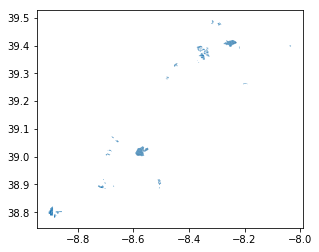

In [11]:
# from __future__ import print_function

# glaciers.plot()
# plt.show()

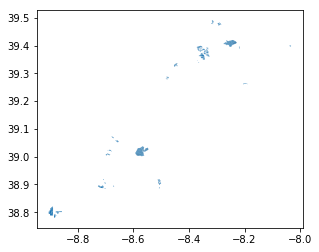

In [35]:
glaciers.plot()
plt.show()

In [12]:
from mpl_toolkits.basemap import Basemap
import numpy as np
water = 'lightskyblue'
earth = 'cornsilk'
juneau_lon, juneau_lat = -9.39, -7.02 #-134.4167, 58.3
 
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000,
    resolution='i',
    projection='aea',
    ellps='WGS84',
    lat_1=-9.37, lat_2=-7.02,
    lat_0=58., lon_0=-134)

# -9.37 -7.02

# 38.52 39.77

coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(
    np.arange(-180, 180, 2), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80), 
    labels=[True, True, False, False])
x, y = mm(juneau_lon, juneau_lat)
juneau = mm.scatter(x, y, 80, label="Juneau", color='red', zorder=10)

OSError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.

/home/indradenbakker/anaconda3/envs/environment-deep-learning-cookbook/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/indradenbakker/anaconda3/envs/environment-deep-learning-cookbook/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


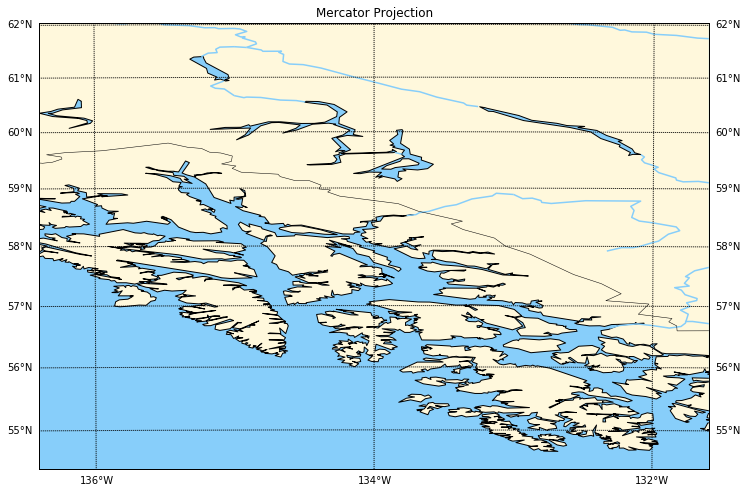

In [24]:
mm.plot(x,y, marker ='o', markersize=6, markerfacecolor='red', linewidth=0)

plt.title('Mercator Projection')
plt.show()

In [62]:
patches = []
selection = glaciers[glaciers.geometry.intersects(studyarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        patches.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, poly)
            patches.append(PolygonPatch(mpoly))
    else:
        print(poly, "is neither a polygon nor a multi-polygon. Skipping it.")
glaciers = ax1.add_collection(
    matplotlib.collections.PatchCollection(patches, match_original=True))

AttributeError: 'str' object has no attribute '_geom'

In [37]:
glob_minx = glaciers['geometry'].bounds['minx'].min()
glob_maxx = glaciers['geometry'].bounds['maxx'].max()

glob_miny = glaciers['geometry'].bounds['miny'].min()
glob_maxy = glaciers['geometry'].bounds['maxy'].max()

In [38]:
# afilter = lng > -10
# flng = lng[afilter]
# flat = lat[afilter]
# fnames = np.asarray(names)[afilter]

# extent = flng.min() - 1, flng.max() + 1, flat.min() - .5, flat.max() + 1
extent = glob_minx - 1, glob_maxx + 1, glob_miny - 1, glob_maxy + 1
print(extent)

(-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)


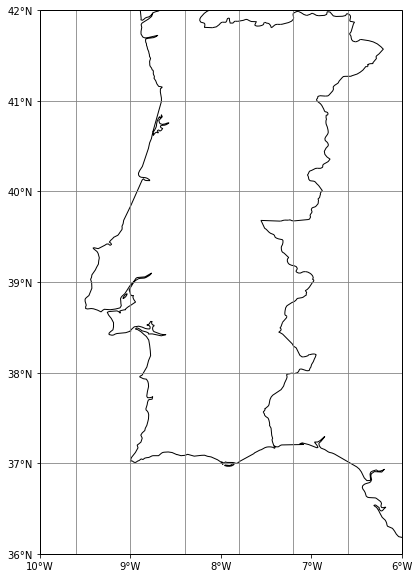

In [56]:
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

def basemap_portugal():
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    ax.set_extent(extents=extent, crs=ccrs.Geodetic())
    ax.coastlines(resolution='10m')
    BORDERS.scale = '10m'
    ax.add_feature(BORDERS)

    ax.gridlines(color='.5')
    ax.set_xticks(np.arange(-10, -5, 1), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(36, 43, 1), crs=ccrs.PlateCarree())

    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return fig, ax

fig, ax = basemap_portugal()
plt.show()

In [15]:
import shapely
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection



POLYGON ((-8.032444467224765 38.7794349596748, -8.032444467224765 39.49092386624942, -8.904890435946003 39.49092386624942, -8.904890435946003 38.7794349596748, -8.032444467224765 38.7794349596748))


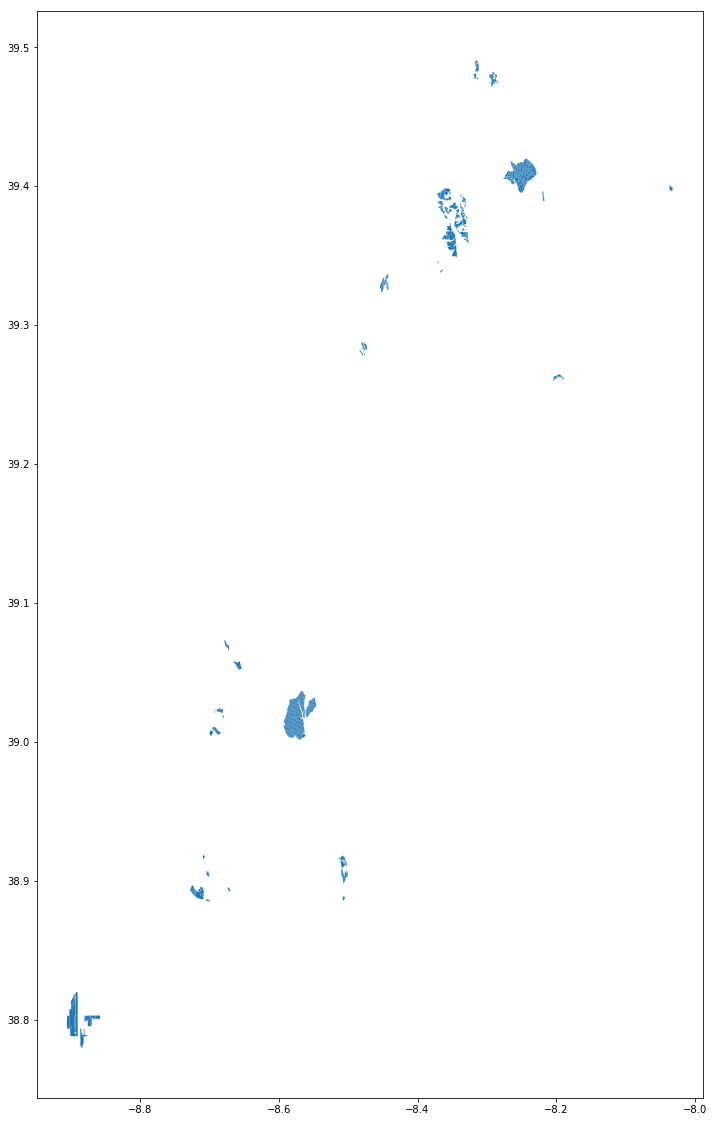

In [39]:
stdarea = shapely.geometry.box(glob_minx, glob_miny, glob_maxx, glob_maxy)
print(stdarea)

ax1 = glaciers[glaciers.geometry.intersects(stdarea)].plot()

ax1.set_aspect(2)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()

(-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)
POLYGON ((-8.335000000000001 39.4, -8.335000000000001 39.35, -8.375 39.35, -8.375 39.4, -8.335000000000001 39.4))


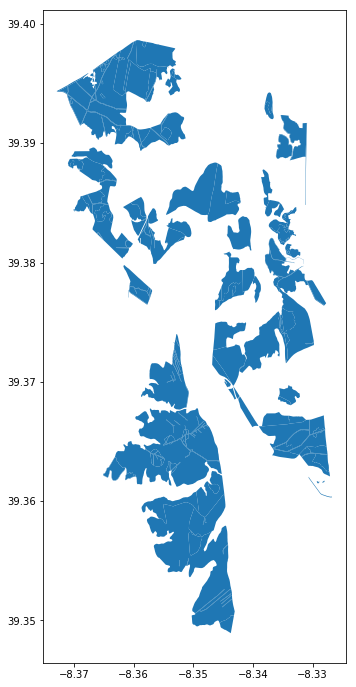

In [80]:
# 1e extract
# (-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)
# POLYGON ((-8.855 38.775, -8.855 38.825, -8.914999999999999 38.825, -8.914999999999999 38.775, -8.855 38.775))

# Area 2
# (-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)
# POLYGON ((-8.555 39.04, -8.555 39, -8.58 39, -8.58 39.04, -8.555 39.04))

# Area 3
# (-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)
# POLYGON ((-8.335000000000001 39.4, -8.335000000000001 39.35, -8.375 39.35, -8.375 39.4, -8.335000000000001 39.4))

# Area4
# (-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923866249418)
# POLYGON ((-8.188000000000001 39.27, -8.188000000000001 39.25, -8.205 39.25, -8.205 39.27, -8.188000000000001 39.27))


stdarea = shapely.geometry.box(-8.205, 39.27, -8.188, 39.255)
# (-9.9048904359460028, -7.0324444672247655, 37.779434959674802, 40.490923146366235)
print(extent)
print(stdarea)

ax1 = glaciers[glaciers.geometry.intersects(stdarea)].plot()

ax1.set_aspect(2)
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.show()

In [161]:
# fig, ax = plt.subplots(figsize=(12, 10))
# fig, ax1 = plt.subplots(figsize=(12, 10))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(extents=extent, crs=ccrs.Geodetic())
ax.coastlines(resolution='10m')
BORDERS.scale = '10m'
ax.add_feature(BORDERS)

ax.gridlines(color='.5')
ax.set_xticks(np.arange(-10, -5, 1), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(36, 43, 1), crs=ccrs.PlateCarree())

ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())


patches = []
selection = glaciers[glaciers.geometry.intersects(stdarea)]
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(mm, poly)
        patches.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(mm, subpoly)
            patches.append(PolygonPatch(mpoly))
    else:
        print(poly, "is neither a polygon nor a multi-polygon. Skipping it.")
glcs = ax.add_collection(PatchCollection(patches, match_original=False))
ax = glaciers[glaciers.geometry.intersects(stdarea)].plot()


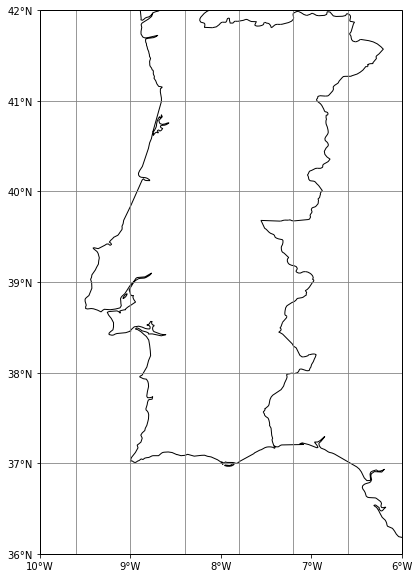

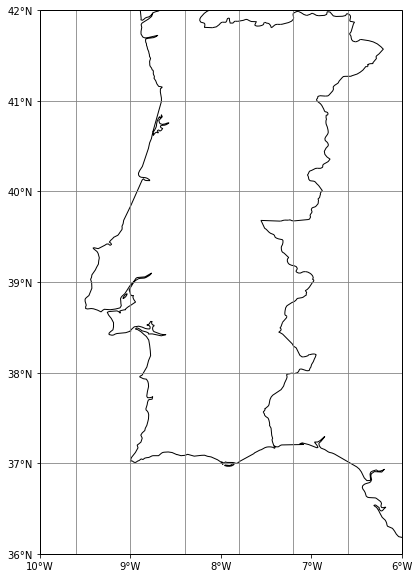

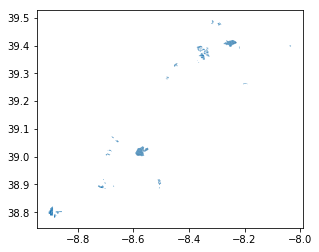

In [162]:
plt.show()

In [139]:
glcs

In [91]:
glob_maxx

-8.0324444672247655

In [92]:
glob_maxy

39.490923146366235

In [94]:
glob_minx

-8.9048904359460028

In [124]:
len(patches)

1950